In [19]:
import pandas as pd
import numpy as np
# Se cargan librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy import stats

In [20]:
!wget https://sih.hidrocarburos.gob.mx/downloads/PRODUCCION_POZOS.zip

--2025-03-23 00:22:25--  https://sih.hidrocarburos.gob.mx/downloads/PRODUCCION_POZOS.zip
Resolving sih.hidrocarburos.gob.mx (sih.hidrocarburos.gob.mx)... 104.21.43.142, 172.67.180.53, 2606:4700:3036::6815:2b8e, ...
Connecting to sih.hidrocarburos.gob.mx (sih.hidrocarburos.gob.mx)|104.21.43.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155239407 (148M) [application/x-zip-compressed]
Saving to: ‘PRODUCCION_POZOS.zip.1’

PRODUCCION_POZOS.zi 100%[===================>] 148.05M  45.3MB/s    in 3.6s    

2025-03-23 00:22:29 (41.6 MB/s) - ‘PRODUCCION_POZOS.zip.1’ saved [155239407/155239407]



In [21]:
!unzip PRODUCCION_POZOS.zip

Archive:  PRODUCCION_POZOS.zip
replace POZOS_COMPILADO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
import pandas as pd
import numpy as np
import os
path = "CUENCAS"
files = os.listdir(path)
df_list = []
for file in files:
  df = pd.read_csv(os.path.join(path, file), skiprows=10, encoding="latin-1")
  df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

<ipython-input-22-1e8667f0a0c2>:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), skiprows=10, encoding="latin-1")
<ipython-input-22-1e8667f0a0c2>:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), skiprows=10, encoding="latin-1")
<ipython-input-22-1e8667f0a0c2>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, ignore_index=True)


In [23]:
df.columns

Index(['Fecha', 'Identificador', 'Nombre_del_pozo', 'Cuenca',
       'Asignación_o_Contrato', 'Hidrocarburos_Liquidos_(Mbd)',
       'Petróleo_(Mbd)', 'Condensado_(Mbd)', 'Gas_asociado_(MMpcd)',
       'Gas_no_asociado_(MMpcd)', 'Agua_(Mbd)'],
      dtype='object')

In [24]:
id=df[['Identificador','Petróleo_(Mbd)','Condensado_(Mbd)','Gas_asociado_(MMpcd)','Gas_no_asociado_(MMpcd)','Agua_(Mbd)']].groupby('Identificador').sum()

In [25]:
id.head()

,Petróleo_(Mbd),Condensado_(Mbd),Gas_asociado_(MMpcd),Gas_no_asociado_(MMpcd),Agua_(Mbd)
Identificador,,,,,
1000000006,0.584193,0.0,1.379410,0.0,0.058625
1000000013,611.794736,0.0,503.699569,0.0,0.324320
1000000014,726.339875,0.0,567.423815,0.0,2.179807
1000000016,1016.647035,0.0,853.763941,0.0,33.479231
1000000018,692.284721,0.0,589.730699,0.0,0.000000


In [26]:
#generar una matriz equivalente de id reemplazando los valores diferentes de cero por unos
id_bool = id.applymap(lambda x: 1 if x != 0 else 0)
id_bool.head()

<ipython-input-26-b5b8d48998bf>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  id_bool = id.applymap(lambda x: 1 if x != 0 else 0)


,Petróleo_(Mbd),Condensado_(Mbd),Gas_asociado_(MMpcd),Gas_no_asociado_(MMpcd),Agua_(Mbd)
Identificador,,,,,
1000000006,1,0,1,0,1
1000000013,1,0,1,0,1
1000000014,1,0,1,0,1
1000000016,1,0,1,0,1
1000000018,1,0,1,0,0


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [28]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [29]:
encoder=TransactionEncoder().fit(id_bool)
onehot=encoder.transform(id_bool)
onehot

array([[ True,  True, False, ...,  True, False,  True],
       [ True,  True, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [30]:
freq_items=apriori(id_bool,min_support=0.1,max_len=3,use_colnames=True)
print(freq_items)

     support                                           itemsets
0   0.704029                                   (Petróleo_(Mbd))
1   0.191148                                 (Condensado_(Mbd))
2   0.700009                             (Gas_asociado_(MMpcd))
3   0.343153                          (Gas_no_asociado_(MMpcd))
4   0.885357                                       (Agua_(Mbd))
5   0.699872             (Gas_asociado_(MMpcd), Petróleo_(Mbd))
6   0.671737                       (Agua_(Mbd), Petróleo_(Mbd))
7   0.191148        (Gas_no_asociado_(MMpcd), Condensado_(Mbd))
8   0.179912                     (Agua_(Mbd), Condensado_(Mbd))
9   0.668174                 (Gas_asociado_(MMpcd), Agua_(Mbd))
10  0.258975              (Gas_no_asociado_(MMpcd), Agua_(Mbd))
11  0.668174  (Gas_asociado_(MMpcd), Agua_(Mbd), Petróleo_(M...
12  0.179912  (Gas_no_asociado_(MMpcd), Agua_(Mbd), Condensa...


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [31]:
rules = association_rules(freq_items, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Gas_asociado_(MMpcd)),(Petróleo_(Mbd)),0.700009,0.704029,0.699872,0.999804,1.420119,1.0,0.207046,1512.019731,0.986142,0.993903,0.999339,0.996950
1,(Petróleo_(Mbd)),(Gas_asociado_(MMpcd)),0.704029,0.700009,0.699872,0.994096,1.420119,1.0,0.207046,50.813837,0.999534,0.993903,0.980320,0.996950
2,(Agua_(Mbd)),(Petróleo_(Mbd)),0.885357,0.704029,0.671737,0.758719,1.077682,1.0,0.048420,1.226665,0.628751,0.732019,0.184781,0.856426
3,(Petróleo_(Mbd)),(Agua_(Mbd)),0.704029,0.885357,0.671737,0.954133,1.077682,1.0,0.048420,2.499451,0.243544,0.732019,0.599912,0.856426
4,(Gas_no_asociado_(MMpcd)),(Condensado_(Mbd)),0.343153,0.191148,0.191148,0.557034,2.914149,1.0,0.125555,1.825993,1.000000,0.557034,0.452353,0.778517
5,(Condensado_(Mbd)),(Gas_no_asociado_(MMpcd)),0.191148,0.343153,0.191148,1.000000,2.914149,1.0,0.125555,inf,0.812073,0.557034,1.000000,0.778517
6,(Agua_(Mbd)),(Condensado_(Mbd)),0.885357,0.191148,0.179912,0.203209,1.063095,1.0,0.010678,1.015136,0.517698,0.200662,0.014911,0.572214
7,(Condensado_(Mbd)),(Agua_(Mbd)),0.191148,0.885357,0.179912,0.941219,1.063095,1.0,0.010678,1.950334,0.073376,0.200662,0.487267,0.572214
8,(Gas_asociado_(MMpcd)),(Agua_(Mbd)),0.700009,0.885357,0.668174,0.954522,1.078121,1.0,0.048416,2.520836,0.241542,0.728500,0.603306,0.854608
9,(Agua_(Mbd)),(Gas_asociado_(MMpcd)),0.885357,0.700009,0.668174,0.754695,1.078121,1.0,0.048416,1.222928,0.632051,0.728500,0.182290,0.854608


In [32]:
rules['lhs_items']=rules.consequents.apply(lambda x: len(x))
rules[rules['lhs_items']>0].sort_values(by='lift',ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,lhs_items
21,(Condensado_(Mbd)),"(Gas_no_asociado_(MMpcd), Agua_(Mbd))",0.191148,0.258975,0.179912,0.941219,3.634399,1.0,0.130410,12.606461,0.896149,0.665822,0.920676,0.817964,2
16,"(Gas_no_asociado_(MMpcd), Agua_(Mbd))",(Condensado_(Mbd)),0.258975,0.191148,0.179912,0.694709,3.634399,1.0,0.130410,2.649445,0.978174,0.665822,0.622562,0.817964,1
18,"(Condensado_(Mbd), Agua_(Mbd))",(Gas_no_asociado_(MMpcd)),0.179912,0.343153,0.179912,1.000000,2.914149,1.0,0.118175,inf,0.800947,0.524291,1.000000,0.762146,1


In [33]:
#seleccionar las reglas anteriores y mostrarlas como heatmap
import seaborn as sns
#obtener nombres de productos como cadenas
rules['antecedentes_']=rules.antecedents.apply(lambda x: ','.join(list(x)))
rules['consequentes_']=rules.consequents.apply(lambda x: ','.join(list(x)))
rules
#obtener una matriz usando lift como pivot
pivot=rules[rules.lhs_items==2].pivot(index='antecedentes_',columns='consequentes_',values='lift')
pivot

consequentes_,"Agua_(Mbd),Petróleo_(Mbd)","Condensado_(Mbd),Agua_(Mbd)","Gas_asociado_(MMpcd),Agua_(Mbd)","Gas_asociado_(MMpcd),Petróleo_(Mbd)","Gas_no_asociado_(MMpcd),Agua_(Mbd)","Gas_no_asociado_(MMpcd),Condensado_(Mbd)"
antecedentes_,,,,,,
Agua_(Mbd),NaN,NaN,NaN,1.078332,NaN,1.063095
Condensado_(Mbd),NaN,NaN,NaN,NaN,3.634399,NaN
Gas_asociado_(MMpcd),1.420976,NaN,NaN,NaN,NaN,NaN
Gas_no_asociado_(MMpcd),NaN,2.914149,NaN,NaN,NaN,NaN
Petróleo_(Mbd),NaN,NaN,1.420397,NaN,NaN,NaN


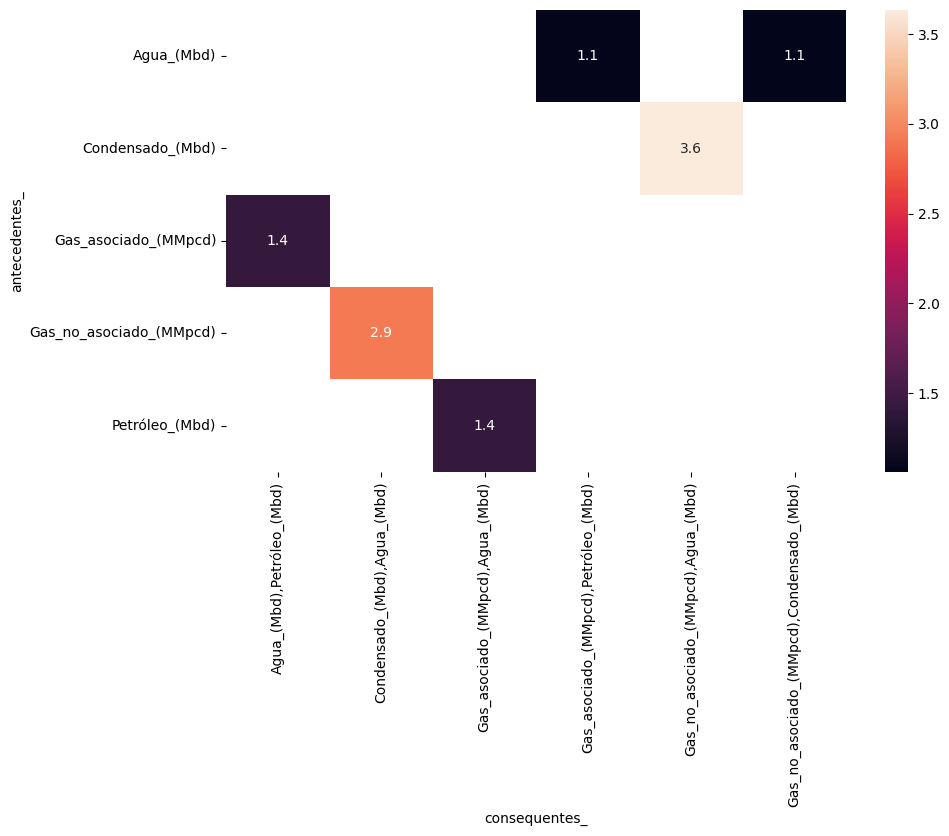

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(pivot,annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()